In [1]:
from get_datasets.get_datasets import get_data_array, get_datasets
import matplotlib.pyplot as plt


In [2]:
x_train, y_train, x_val, y_val, x_test, y_test = get_data_array(train_dir='chest_xray_new/train',
                                                                test_dir='chest_xray_new/test')

  0%|          | 0/3883 [00:00<?, ?it/s]

  0%|          | 0/2698 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/234 [00:00<?, ?it/s]

In [3]:
train_ds, val_ds, test_ds = get_datasets(x_train, y_train, x_test, y_test, x_val, y_val)

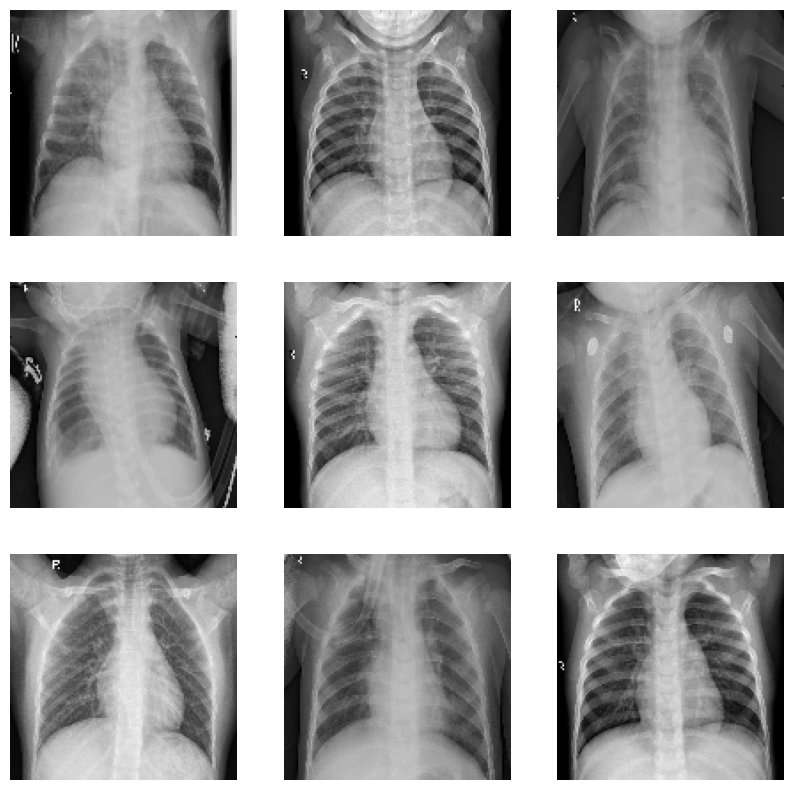

In [4]:
sample_images, _ = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i, image in enumerate(sample_images[:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("int"))
    plt.axis("off")

In [5]:
from src.Evolutionary_Algorithm import create_first_population, select_best_2_model, create_next_population

first_population = create_first_population(population=10)
parent_1, parent_2 = select_best_2_model(train_ds, val_ds, test_ds, population_array=first_population, epochs=1)
next_population = create_next_population(parent_1, parent_2, 10)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 128, 128, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 64, 64, 16)   208         ['rescaling_1[0][0]']            
                                                                                                  
 batch_normalization_19 (BatchN  (None, 64, 64, 16)  64          ['conv2d_24[0][0]']        

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for E:/Genetic_NAS/checkpoints/checkpoint